# Step 1: Importing the libraries

In [3]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

# Step 2: Loading the database

In [81]:
from tensorflow.keras.datasets import fashion_mnist

In [82]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Step 3: Data Visualization

In [83]:
x_train.shape

(60000, 28, 28)

In [84]:
x_test.shape

(10000, 28, 28)

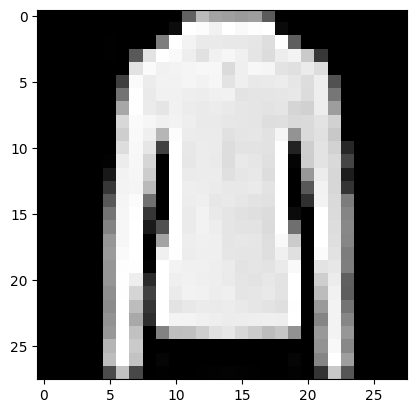

In [85]:
i = random.randint(1, 6000)
plt.imshow(x_train[i], cmap = 'gray')

In [86]:
label = y_train[i]
label

4

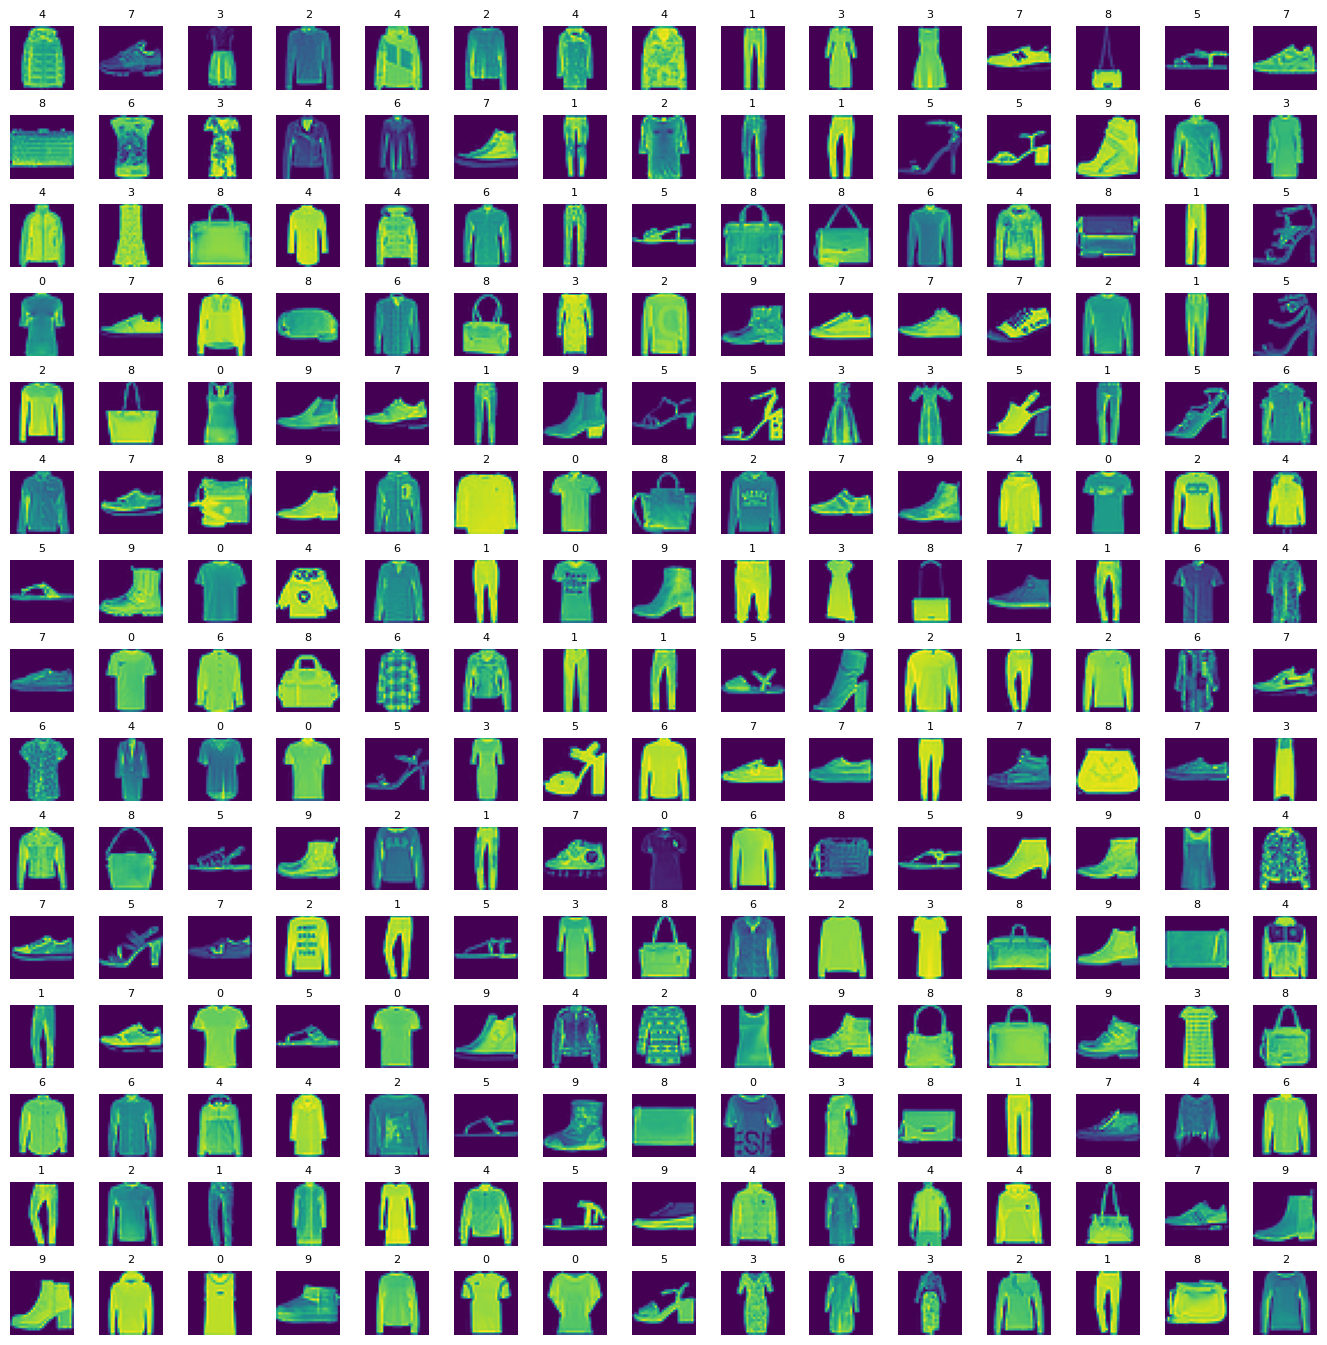

In [87]:
W_grid = 15
L_grid = 15

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))
axes = axes.ravel()
n_training = len(x_train)

for i in np.arange(0, W_grid * L_grid):
    index = np.random.randint(0, n_training)
    axes[i].imshow( x_train[index] )
    axes[i].set_title(y_train[index], fontsize = 8)
    axes[i].axis('off')
plt.subplots_adjust(hspace=0.4)

# Step 4: Adding Noise to Images

In [88]:
x_train = x_train/255
x_test = x_test/255

In [89]:
added_noise =  np.random.randn(*(28,28))

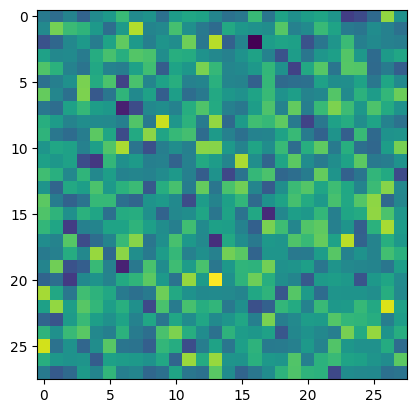

In [90]:
plt.imshow(added_noise);

In [91]:
noise_factor = 0.3
added_noise = noise_factor * np.random.randn(*(28,28))

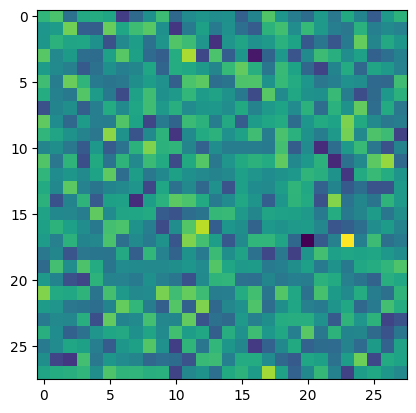

In [92]:
plt.imshow(added_noise);

In [93]:
noise_factor = 0.2
sample_image = x_train[10]
noisy_sample_image = sample_image + noise_factor * np.random.randn(*(28,28))

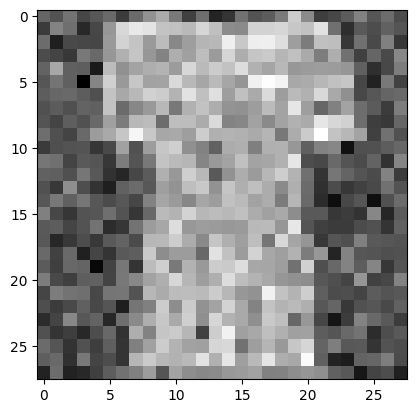

In [94]:
plt.imshow(noisy_sample_image, cmap = 'gray')

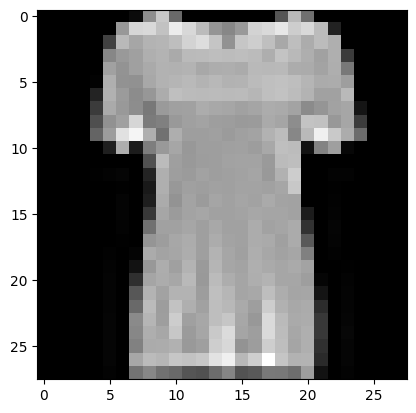

In [95]:
plt.imshow(sample_image, cmap = 'gray')

In [96]:
noisy_sample_image = np.clip(noisy_sample_image, 0.,1.)

In [97]:
print(noisy_sample_image.max(), noisy_sample_image.min())

1.0 0.0


In [98]:
x_train_noisy = []
noise_factor = 0.2

for sample_image in x_train:
  sample_image_noisy = sample_image + noise_factor * np.random.randn(*(28,28))
  sample_image_noisy = np.clip(sample_image_noisy, 0., 1.)
  x_train_noisy.append(sample_image_noisy)


In [99]:
x_train_noisy = np.array(x_train_noisy)

In [100]:
type(x_train_noisy)

numpy.ndarray

In [101]:
x_train.shape

(60000, 28, 28)

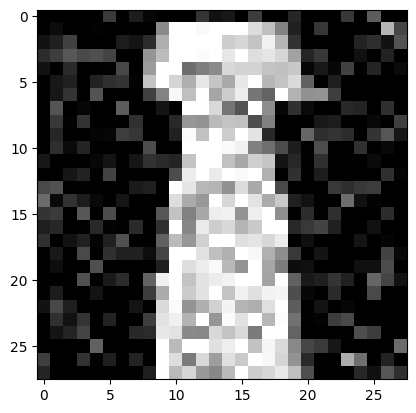

In [102]:
plt.imshow(x_train_noisy[50], cmap = 'gray');

In [103]:
x_test_noisy = []
noise_factor = 0.4

for sample_image in x_test:
  sample_image_noisy = sample_image + noise_factor * np.random.randn(*(28,28))
  sample_image_noisy = np.clip(sample_image_noisy, 0., 1.)
  x_test_noisy.append(sample_image_noisy)

In [104]:
x_test_noisy = np.array(x_test_noisy)

In [105]:
type(x_test_noisy)

numpy.ndarray

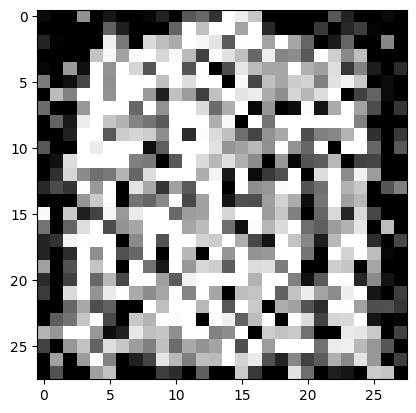

In [106]:
plt.imshow(x_test_noisy[50], cmap = 'gray');

#Step 5: Model Creation and Training

In [114]:
autoencoder = tf.keras.models.Sequential()

# Enconder
autoencoder.add(tf.keras.layers.Conv2D(16, (3,3), strides = 1, padding = 'same', input_shape = (28,28,1)))
autoencoder.add(tf.keras.layers.MaxPooling2D((2,2), padding = 'same'))

autoencoder.add(tf.keras.layers.Conv2D(8, (3,3), strides = 1, padding = 'same'))
autoencoder.add(tf.keras.layers.MaxPooling2D((2,2), padding = 'same'))

# Enconded image
autoencoder.add(tf.keras.layers.Conv2D(8, (3,3), strides = 1, padding = 'same'))

# Decoded image
autoencoder.add(tf.keras.layers.UpSampling2D((2,2)))
autoencoder.add(tf.keras.layers.Conv2DTranspose(8, (3,3), strides = 1, padding = 'same'))
autoencoder.add(tf.keras.layers.UpSampling2D((2,2)))

# Image returned
autoencoder.add(tf.keras.layers.Conv2DTranspose(1, (3,3), strides = 1, padding = 'same', activation = 'sigmoid'))


autoencoder.summary()


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 14, 14, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 14, 14, 8)         1160      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 7, 7, 8)           0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 7, 7, 8)           584       
                                                                 
 up_sampling2d_2 (UpSamplin  (None, 14, 14, 8)        

In [118]:
autoencoder.compile(loss = 'binary_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001))

In [117]:
autoencoder.fit(x_train_noisy.reshape(-1, 28, 28, 1),
                x_train.reshape(-1, 28, 28, 1),
                epochs = 10,
                batch_size = 200)

Epoch 1/10
300/300 [==============================] - 29s 91ms/step - loss: 0.3582
Epoch 2/10
300/300 [==============================] - 33s 110ms/step - loss: 0.3097
Epoch 3/10
300/300 [==============================] - 29s 98ms/step - loss: 0.3038
Epoch 4/10
300/300 [==============================] - 31s 104ms/step - loss: 0.3006
Epoch 5/10
300/300 [==============================] - 26s 88ms/step - loss: 0.2986
Epoch 6/10
300/300 [==============================] - 30s 99ms/step - loss: 0.2972
Epoch 7/10
300/300 [==============================] - 30s 101ms/step - loss: 0.2962
Epoch 8/10
300/300 [==============================] - 26s 88ms/step - loss: 0.2954
Epoch 9/10
300/300 [==============================] - 26s 88ms/step - loss: 0.2947
Epoch 10/10
300/300 [==============================] - 27s 89ms/step - loss: 0.2942


#Step 6: Model Evaluation

In [119]:
denoised_images = autoencoder.predict(x_test_noisy[:15].reshape(-1,28,28,1))

1/1 [==============================] - 0s 136ms/step


In [120]:
denoised_images.shape

(15, 28, 28, 1)

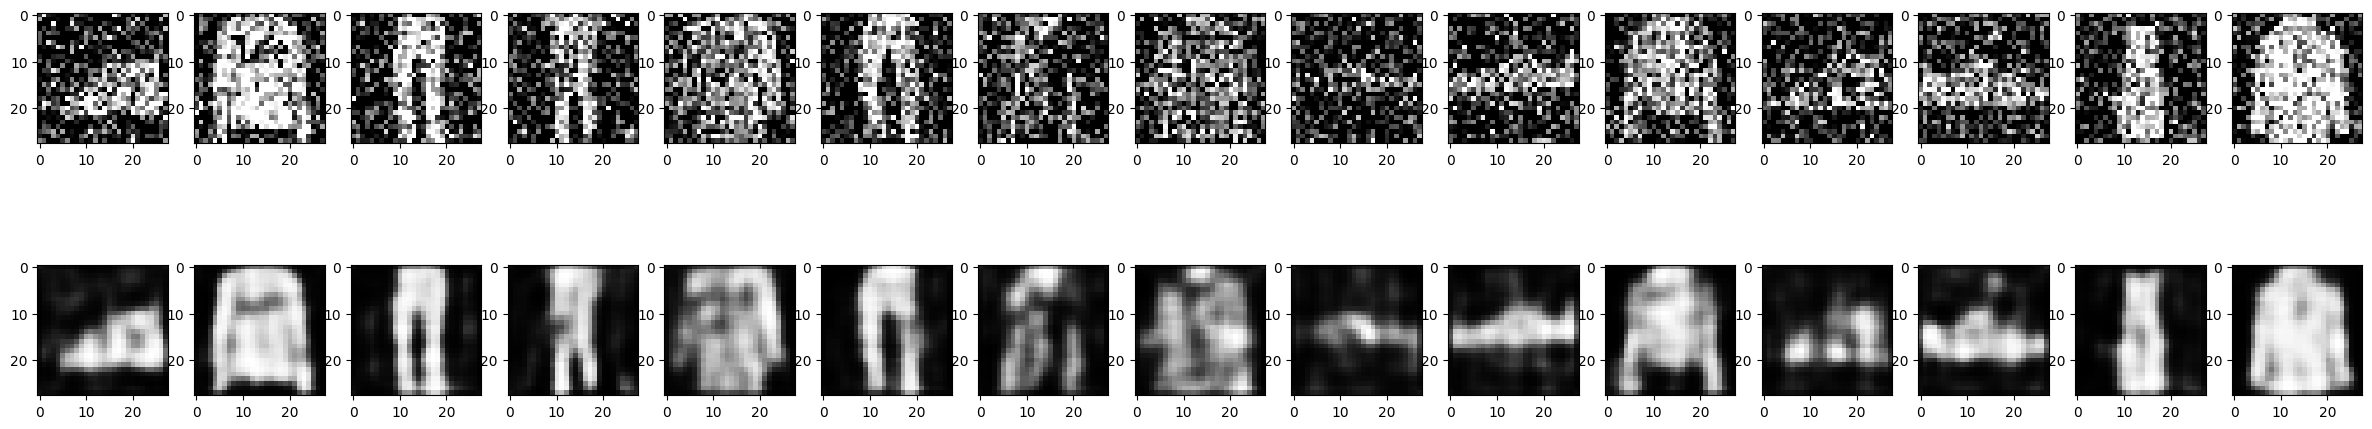

In [121]:
fig, axes = plt.subplots(nrows=2, ncols=15, figsize=(30,6))
for images, row in zip([x_test_noisy[:15], denoised_images], axes):
  for img, ax in zip(images, row):
    ax.imshow(img.reshape((28,28)), cmap='gray')